In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

df = pd.read_csv('Telkomsel_Data.csv')
print(df.head(15), "\n")
print(df.info(), "\n")

   ID Pelanggan  Durasi Langganan (bulan)  Jumlah Panggilan  \
0          P001                        13                83   
1          P002                        32                68   
2          P003                         2                42   
3          P004                        23                17   
4          P005                        18                21   
5          P006                         7                24   
6          P007                        32                 6   
7          P008                        23                10   
8          P009                        27                34   
9          P010                        24                28   
10         P011                        11                98   
11         P012                        34                97   
12         P013                         1                23   
13         P014                        33                57   
14         P015                        21              

In [41]:
# Menghitung missing values
print(df.isnull().sum(), "\n")

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Menghapus kolom 'ID Pelanggan'
df.drop(columns=['ID Pelanggan'], inplace=True)

# mengganti isi kolom Promosi Terakhir dan Churn menjadi 1 dan 0
Promosi = df.replace(to_replace={'Promosi Terakhir': {'YA': 1, 'TIDAK': 0}})
Churn = Promosi.replace(to_replace={'Churn': {'YA': 1, 'TIDAK': 0}})
data2 = Churn
print(data2.head())

ID Pelanggan                0
Durasi Langganan (bulan)    0
Jumlah Panggilan            0
Penggunaan Data (GB)        0
Tagihan Rata-rata           0
Promosi Terakhir            0
Churn                       0
dtype: int64 



C:\Users\ACER\AppData\Local\Temp\ipykernel_12724\3169057567.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Promosi = df.replace(to_replace={'Promosi Terakhir': {'YA': 1, 'TIDAK': 0}})
C:\Users\ACER\AppData\Local\Temp\ipykernel_12724\3169057567.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Churn = Promosi.replace(to_replace={'Churn': {'YA': 1, 'TIDAK': 0}})


   Durasi Langganan (bulan)  Jumlah Panggilan  Penggunaan Data (GB)  \
0                        13                83                     4   
1                        32                68                    10   
2                         2                42                    21   
3                        23                17                     5   
4                        18                21                    10   

   Tagihan Rata-rata  Promosi Terakhir  Churn  
0              30000                 0      1  
1             100000                 0      0  
2             180000                 0      0  
3              60000                 0      1  
4              90000                 0      1  


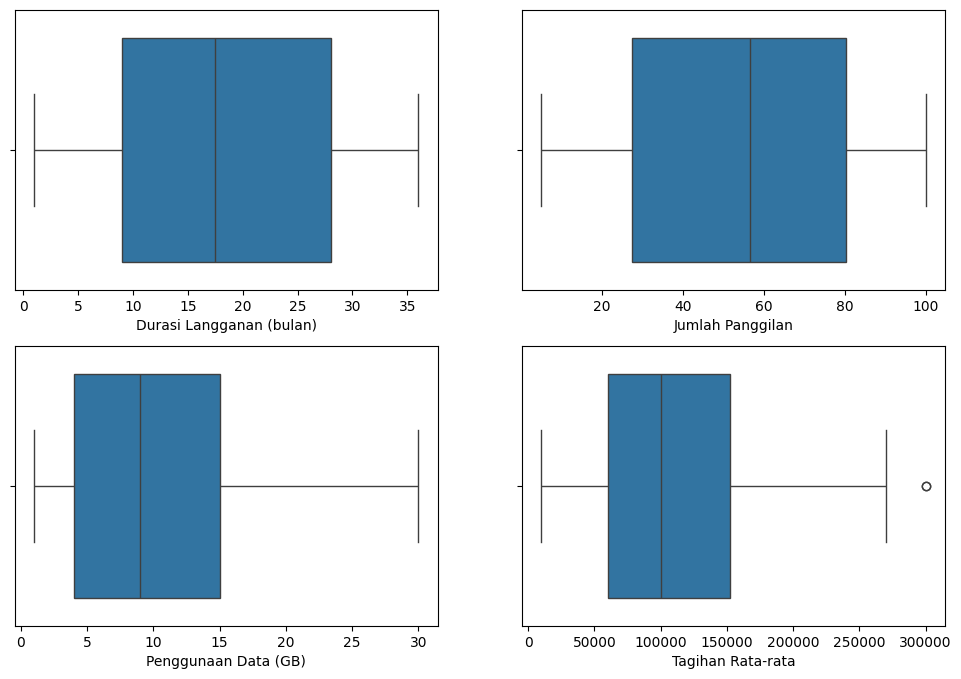

In [42]:
# mencari outlier
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Durasi Langganan (bulan)", data=data2, ax=axes[0, 0])
sns.boxplot(x="Jumlah Panggilan", data=data2, ax=axes[0, 1])
sns.boxplot(x="Penggunaan Data (GB)", data=data2, ax=axes[1, 0])
sns.boxplot(x="Tagihan Rata-rata", data=data2, ax=axes[1, 1])
plt.show()

In [43]:
# menghitung outlier pada tagihan rata-rata
Q1, Q3 = np.percentile(data2["Tagihan Rata-rata"], [25, 75])
selisih = Q3 - Q1
# menghitung batas bawah dan atas
bw = Q1 - 1.5 * selisih
ba = Q3 + 1.5 * selisih
print("Q1: ", Q1, " Q3: ", Q3)
print("Selisih: ", selisih)
print("batas bawah: ", bw)
print("batas atas: ", ba, "\n")

# mencari outlier berada pada baris keberapa
outlier = data2[(data2["Tagihan Rata-rata"] < bw) | (data2["Tagihan Rata-rata"] > ba)]
print(outlier)

Q1:  60000.0  Q3:  152500.0
Selisih:  92500.0
batas bawah:  -78750.0
batas atas:  291250.0 

    Durasi Langganan (bulan)  Jumlah Panggilan  Penggunaan Data (GB)  \
28                         1                21                     1   
58                        10                87                     1   

    Tagihan Rata-rata  Promosi Terakhir  Churn  
28             300000                 1      0  
58             300000                 1      0  


Nilai mean untuk mengganti outlier:  109183.67346938775 

Data pada baris 28:
Durasi Langganan (bulan)         1.000000
Jumlah Panggilan                21.000000
Penggunaan Data (GB)             1.000000
Tagihan Rata-rata           109183.673469
Promosi Terakhir                 1.000000
Churn                            0.000000
Name: 28, dtype: float64 

Data pada baris 58:
Durasi Langganan (bulan)        10.000000
Jumlah Panggilan                87.000000
Penggunaan Data (GB)             1.000000
Tagihan Rata-rata           109183.673469
Promosi Terakhir                 1.000000
Churn                            0.000000
Name: 58, dtype: float64 



C:\Users\ACER\AppData\Local\Temp\ipykernel_12724\3275685233.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109183.67346938775' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data2.loc[(data2["Tagihan Rata-rata"] < bw) | (data2["Tagihan Rata-rata"] > ba), "Tagihan Rata-rata"] = rerata


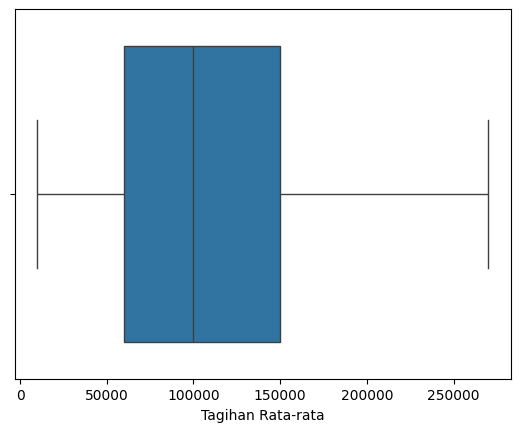

In [44]:
# Menghitung mean dari nilai yang bukan outlier
rerata = data2[(data2["Tagihan Rata-rata"] >= bw) & (data2["Tagihan Rata-rata"] <= ba)]["Tagihan Rata-rata"].mean()
print("Nilai mean untuk mengganti outlier: ", rerata, "\n")

# Mengganti outlier dengan mean
data2.loc[(data2["Tagihan Rata-rata"] < bw) | (data2["Tagihan Rata-rata"] > ba), "Tagihan Rata-rata"] = rerata
print("Data pada baris 28:")
print(data2.iloc[28], "\n")
print("Data pada baris 58:")
print(data2.iloc[58], "\n")
sns.boxplot(x="Tagihan Rata-rata", data=data2)
plt.show()

Churn
0    54
1    46
Name: count, dtype: int64


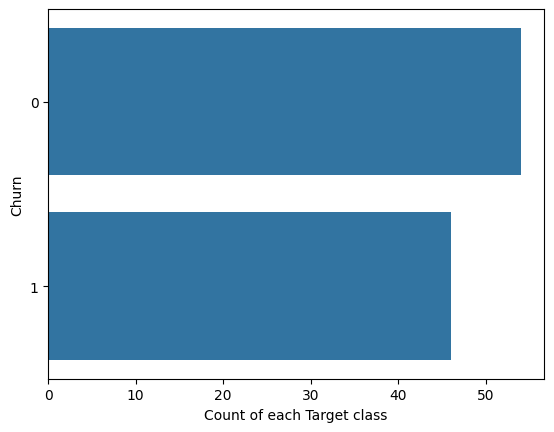

In [45]:
# visualisasi data hasil data preprocessing
print(data2['Churn'].value_counts())
sns.countplot(y=data2.Churn, data=data2)
plt.xlabel('Count of each Target class')
plt.ylabel('Churn')
plt.show()

In [46]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report

# pemilihan fitur dan label
X_before = data2.drop(['Churn'], axis=1).values
y = data2['Churn'].values

X = preprocessing.normalize(X_before)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}', '\n')

# buat fungsi K fold
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 10

# Get the fold indices
fold_indices = kfold_indices(X, k)

Dimensi Feature: (100, 5)
Class: {np.int64(0), np.int64(1)} 



In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=3)


scores = []
classification_reports = []
expected_labels = [0, 1]

for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    knn.fit(X_train, y_train)
    y_prediksi = knn.predict(X_test)

    fold_score = accuracy_score(y_test, y_prediksi)
    scores.append(fold_score)

    # Simpan classification report dengan zero_division=0 untuk menghindari error
    report = classification_report(y_test, y_prediksi, labels=expected_labels, output_dict=True, zero_division=0)
    classification_reports.append(report)

mean_accuracy = np.mean(scores)
print("\nK-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy KNN:", mean_accuracy, "\n")

# Hitung rata-rata classification report
def average_classification_report(classification_reports):
    avg_report = {}
    metrics = ['precision', 'recall', 'f1-score']

    # Inisialisasi dictionary untuk menyimpan total metrik
    for label in expected_labels:
        avg_report[label] = {metric: 0 for metric in metrics}

    avg_report['accuracy'] = np.mean(scores)

    # Hitung jumlah fold
    num_folds = len(classification_reports)

    for report in classification_reports:
        for label in expected_labels:
            # Convert label to string before accessing report
            label_str = str(label)
            if label_str in report:
                for metric in metrics:
                    avg_report[label][metric] += report[label_str][metric]
            else:
                print(f"Label {label} tidak ditemukan dalam laporan.")

    # Hitung rata-rata metrik untuk setiap label
    for label in avg_report:
        if label != 'accuracy': # Skip accuracy as it is already the average
            for metric in metrics:
                avg_report[label][metric] /= num_folds

    return avg_report

# Hitung rata-rata classification report
average_report = average_classification_report(classification_reports)

# Tampilkan rata-rata classification report
print("\nRata-Rata Classification Report:")
for label, metrics in average_report.items():
    print(f"\nLabel {label}:")
    # check if metrics is a dictionary
    if isinstance(metrics, dict):
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.2f}")
    else:
        print(f"  {metrics:.2f}") # print the value directly if it's not a dictionary


K-Fold Cross-Validation Scores: [0.8, 0.5, 0.3, 0.6, 0.7, 0.7, 0.3, 0.6, 0.4, 0.8]
Mean Accuracy KNN: 0.5700000000000001 


Rata-Rata Classification Report:

Label 0:
  precision: 0.62
  recall: 0.58
  f1-score: 0.59

Label 1:
  precision: 0.52
  recall: 0.55
  f1-score: 0.52

Label accuracy:
  0.57


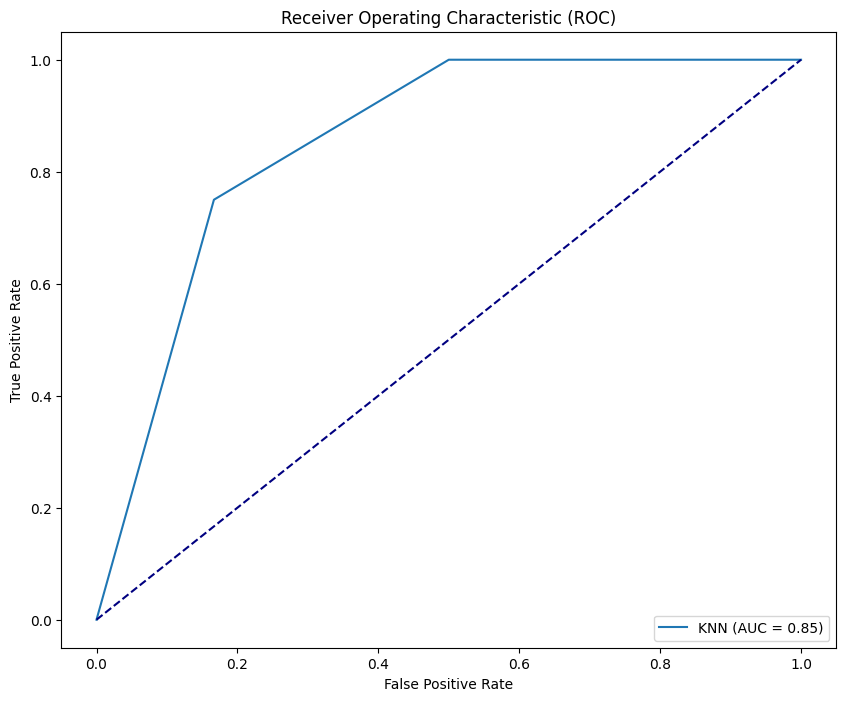

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Inisialisasi model
models = {
    'KNN': knn
}

# Latih dan evaluasi model
plt.figure(figsize=(10, 8))

for name, model in models.items():


  scores = []

  # Iterate through each fold
  for train_indices, test_indices in fold_indices:
      X_train, y_train = X[train_indices], y[train_indices]
      X_test, y_test = X[test_indices], y[test_indices]

      # Train the model
      model.fit(X_train, y_train)

      # buat prediksi
      y_prediksi = model.predict_proba(X_test)[:, 1]


      # Calculate accuracy for each fold
      fold_score = accuracy_score(y_test, model.predict(X_test))
      scores.append(fold_score)

  # Hitung ROC curve
  fpr, tpr, _ = roc_curve(y_test, y_prediksi)
  # Hitung AUC
  roc_auc = roc_auc_score(y_test, y_prediksi)
  # Plot ROC curve
  plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [49]:
import math

new_data_before = [[21, 20, 10, 200000, 1]]
new_data = preprocessing.normalize(new_data_before)
# Prediksi churn (0 = tidak churn, 1 = churn)
prediction = knn.predict(new_data)

# Hasil prediksi
if prediction[0] == 1:
    print("Pelanggan diprediksi churn.")
else:
    print("Pelanggan diprediksi tidak churn.")

# Prediksi probabilitas churn
prediction_proba = knn.predict_proba(new_data)

# Print probabilitas churn
print(f"Probabilitas tidak churn:  {math.floor(prediction_proba[0][0] * 100)}")
print(f"Probabilitas churn: {math.floor(prediction_proba[0][1] * 100)}")

Pelanggan diprediksi churn.
Probabilitas tidak churn:  33
Probabilitas churn: 66


In [50]:
import pickle
pickle.dump(knn, open("model.pkl","wb"))